===== Model Evaluation =====
Linear SVM - Accuracy: 0.9649, Precision: 0.9636, Recall: 0.9815, F1: 0.9725
RBF SVM   - Accuracy: 0.9357, Precision: 0.9076, Recall: 1.0000, F1: 0.9515

===== Cross Validation (5-Fold) =====
Linear SVM CV Mean Accuracy: 0.9455
RBF SVM CV Mean Accuracy:   0.9122


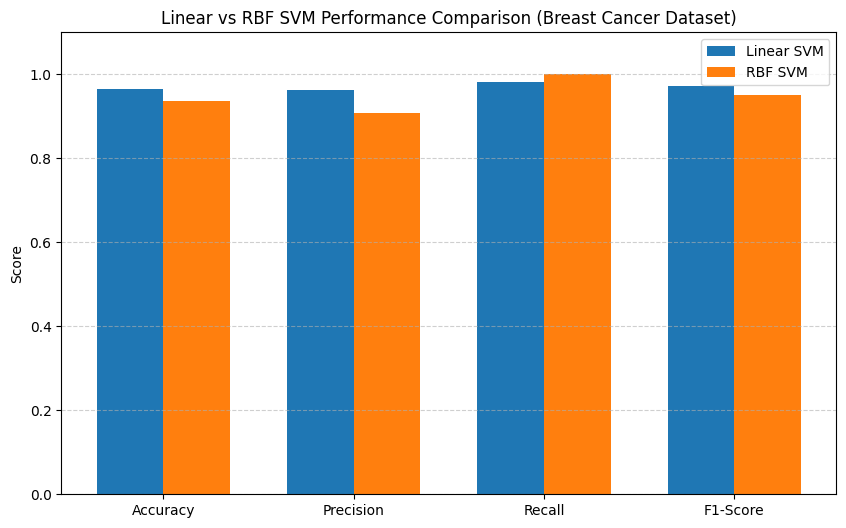

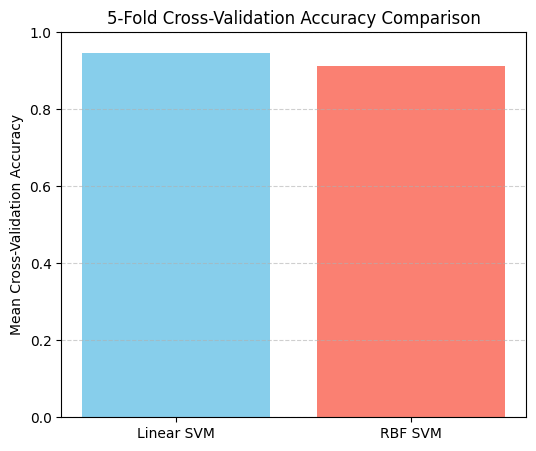

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load Breast Cancer dataset
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Initialize models
linear_svm = SVC(kernel="linear", C=1.0, random_state=42)
rbf_svm = SVC(kernel="rbf", C=1.0, gamma='scale', random_state=42)

# Train both models
linear_svm.fit(X_train, y_train)
rbf_svm.fit(X_train, y_train)

# Predictions
y_pred_linear = linear_svm.predict(X_test)
y_pred_rbf = rbf_svm.predict(X_test)

# Evaluate both models
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

linear_scores = [
    accuracy_score(y_test, y_pred_linear),
    precision_score(y_test, y_pred_linear),
    recall_score(y_test, y_pred_linear),
    f1_score(y_test, y_pred_linear)
]

rbf_scores = [
    accuracy_score(y_test, y_pred_rbf),
    precision_score(y_test, y_pred_rbf),
    recall_score(y_test, y_pred_rbf),
    f1_score(y_test, y_pred_rbf)
]

# Cross-validation comparison (5-fold)
cv_linear = cross_val_score(linear_svm, X, y, cv=5).mean()
cv_rbf = cross_val_score(rbf_svm, X, y, cv=5).mean()

print("===== Model Evaluation =====")
print(f"Linear SVM - Accuracy: {linear_scores[0]:.4f}, Precision: {linear_scores[1]:.4f}, Recall: {linear_scores[2]:.4f}, F1: {linear_scores[3]:.4f}")
print(f"RBF SVM   - Accuracy: {rbf_scores[0]:.4f}, Precision: {rbf_scores[1]:.4f}, Recall: {rbf_scores[2]:.4f}, F1: {rbf_scores[3]:.4f}")
print("\n===== Cross Validation (5-Fold) =====")
print(f"Linear SVM CV Mean Accuracy: {cv_linear:.4f}")
print(f"RBF SVM CV Mean Accuracy:   {cv_rbf:.4f}")

# Plot side-by-side bar chart
x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, linear_scores, width, label='Linear SVM')
plt.bar(x + width/2, rbf_scores, width, label='RBF SVM')

plt.xticks(x, metrics)
plt.ylim(0, 1.1)
plt.ylabel('Score')
plt.title('Linear vs RBF SVM Performance Comparison (Breast Cancer Dataset)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Plot cross-validation comparison
plt.figure(figsize=(6, 5))
plt.bar(['Linear SVM', 'RBF SVM'], [cv_linear, cv_rbf], color=['skyblue', 'salmon'])
plt.ylabel('Mean Cross-Validation Accuracy')
plt.title('5-Fold Cross-Validation Accuracy Comparison')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()
